**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


## Import data

In [2]:
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
print(dir(fdiry))

 [1] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed"                              
 [2] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.ccre_all.bed.gz"                  
 [3] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.enhancer_junke_peak_astarr.bed.gz"
 [4] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.enhancer_junke_peak_wstarr.bed.gz"
 [5] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.gencode_v24_tss.bed.gz"           
 [6] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.nuc.bed.gz"                       
 [7] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.remap2022_nr.bed.gz"              
 [8] "KS91_K562_hg38_ASTARRseq_Input.ccre_all.freq.tsv"                                                    
 [9] "KS91_K562_hg38_ASTARRseq_Input.count.ccre_all.tsv"                                                   
[10] "KS91_K562_hg38_ASTARRs

In [3]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.gencode_v24_tss.bed.gz"
fpath = file.path(fdiry, fname)


### import data
cnames = c("Chrom", "Start", "End",
           "Chrom_TSS", "Start_TSS", "End_TSS", "TSS_ENS", "Score", "Strand", 
           "TSS_Name", "Overlap")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Peak = paste(Chrom, Start, End, sep="_"))

### assign
dat_peak_annot_tss = dat
print(dim(dat))
head(dat)

[1] 23742    12


Chrom,Start,End,Chrom_TSS,Start_TSS,End_TSS,TSS_ENS,Score,Strand,TSS_Name,Overlap,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
chr1,17237,17772,chr1,17436,17437,ENSG00000278267.1,.,-,MIR6859-1,1,chr1_17237_17772
chr1,28903,29613,chr1,29570,29571,ENSG00000227232.5,.,-,WASH7P,1,chr1_28903_29613
chr1,28903,29613,chr1,29553,29554,ENSG00000243485.5,.,+,MIR1302-2HG,1,chr1_28903_29613
chr1,137737,139544,chr1,137965,137966,ENSG00000269981.1,.,-,ENSG00000269981,1,chr1_137737_139544
chr1,777949,779437,chr1,778688,778689,ENSG00000291215.1,.,-,ENSG00000291215,1,chr1_777949_779437
chr1,777949,779437,chr1,778746,778747,ENSG00000237491.10,.,+,LINC01409,1,chr1_777949_779437


In [4]:
print(length(unique(dat_peak_annot_tss$Peak)))
print(length(unique(dat_peak_annot_tss$TSS_ENS)))

[1] 19001
[1] 23742


In [7]:
###
dat = dat_peak_annot_tss
dat = dat %>% 
    group_by(Peak) %>% 
    summarize(
        Name = "TSS",
        Count = n(), 
        Annotate = paste(TSS_Name, collapse = ","),
        .groups="drop")

###
dat_peak_count_tss = dat
print(dim(dat))
head(dat)

[1] 19001     4


Peak,Name,Count,Annotate
<chr>,<chr>,<int>,<chr>
chr1_100036871_100039191,TSS,2,"ENSG00000288826,MFSD14A"
chr1_100098989_100100659,TSS,1,ENSG00000226952
chr1_100132370_100133575,TSS,2,"SASS6,TRMT13"
chr1_100178048_100178357,TSS,1,LRRC39
chr1_100213080_100213553,TSS,1,BRI3P1
chr1_100248889_100250320,TSS,2,"DBT,ENSG00000230287"


In [8]:
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.count.gencode_v24_tss.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat_peak_count_tss, fpath)

In [9]:
ASSAY  = "Tewhey_K562_TileMPRA"
FOLDER = "coverage_astarrseq_peak_macs_input"

### set file path
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "peak_regions.tsv"
fpath = file.path(fdiry, fname)

### import data
dat_region = read_tsv(fpath, show_col_types = FALSE)
print(dim(dat_region))
head(dat_region)

[1] 417   5


Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC
chr8,126782925,126783318,chr8_126782925_126783318,MYC
chr8,126804776,126805825,chr8_126804776_126805825,MYC
chr8,126817018,126817490,chr8_126817018_126817490,MYC
chr8,126820465,126821393,chr8_126820465_126821393,MYC
chr8,126824093,126824987,chr8_126824093_126824987,MYC


In [13]:
peaks = dat_region$Peak
length(peaks)

[1] 417

In [19]:
dat = dat_peak_freq_tss %>% 
    dplyr::filter(Peak %in% peaks) %>%
    dplyr::select(Peak) %>%
    dplyr::mutate(Label = 1)

dat = left_join(dat_region, dat, by = "Peak")
dat = replace(dat, is.na(dat), 0)
dat$Name = "TSS"

dat_peak_label_tss = dat
print(dim(dat))
head(dat)

[1] 417   7


Chrom,Start,End,Peak,Region,Label,Name
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC,0,TSS
chr8,126782925,126783318,chr8_126782925_126783318,MYC,0,TSS
chr8,126804776,126805825,chr8_126804776_126805825,MYC,0,TSS
chr8,126817018,126817490,chr8_126817018_126817490,MYC,0,TSS
chr8,126820465,126821393,chr8_126820465_126821393,MYC,0,TSS
chr8,126824093,126824987,chr8_126824093_126824987,MYC,0,TSS


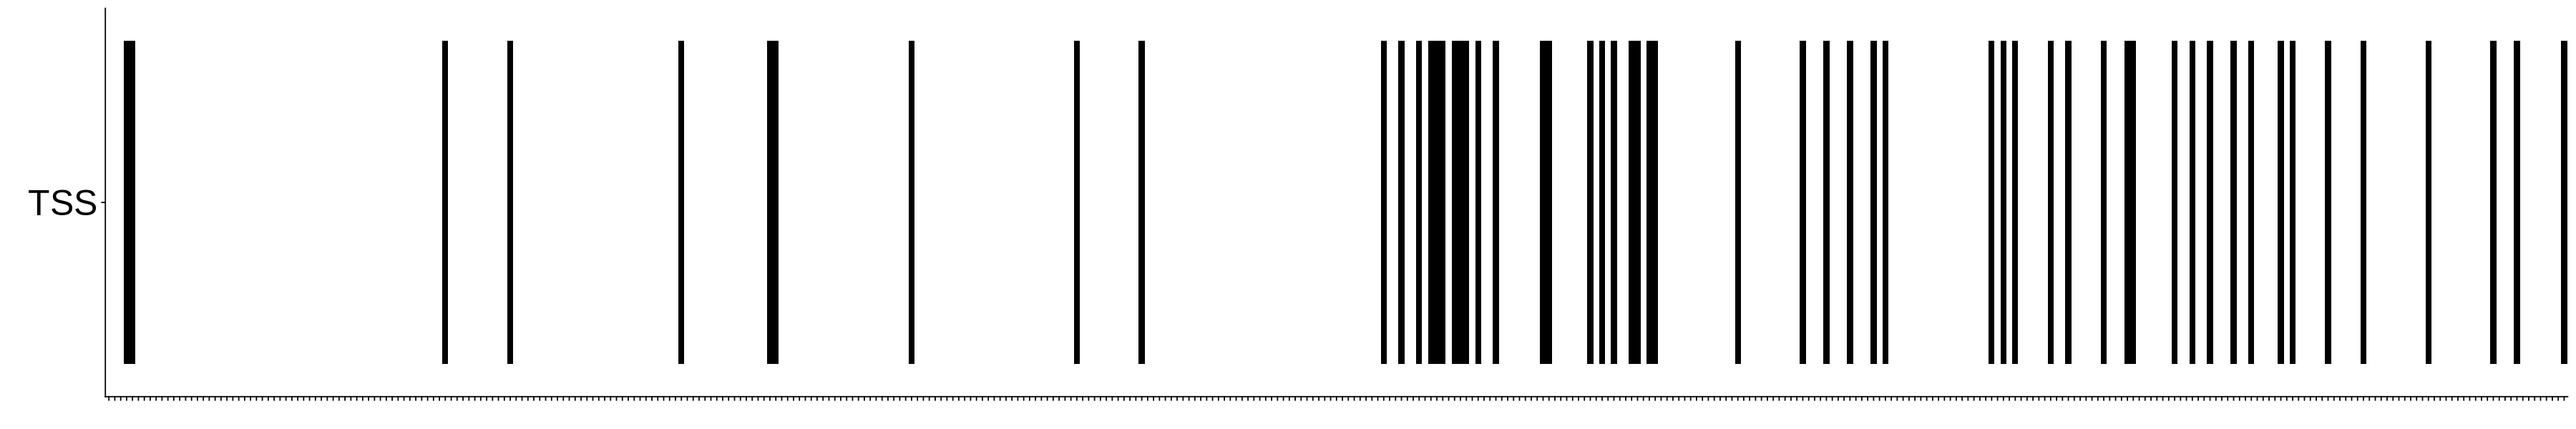

In [22]:
dat = dat_peak_label_tss
dat$Label = as.character(dat$Label)

gpt = ggplot(dat, aes(x=Peak, y=Name, fill=Label)) +
    geom_tile() +
    scale_fill_manual(values = c("1" = "black", "0" = "white")) +
    labs(x="", y="") +
    theme_cowplot() +
    theme(axis.text.x = element_blank(),
          axis.text.y = element_text(size=30),
          legend.position = "none")
    

options(repr.plot.height=5, repr.plot.width=30)
print(gpt)